# Predicting Boston Housing Market Prices

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1):  
CRIM: per capita crime rate by town  
ZN: proportion of residential land zoned for lots over 25,000 sq.ft.  
INDUS: proportion of non-retail business acres per town  
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
NOX: nitric oxides concentration (parts per 10 million)  
1https://archive.ics.uci.edu/ml/datasets/Housing123  
20.2. Load the Dataset 124  
RM: average number of rooms per dwelling  
AGE: proportion of owner-occupied units built prior to 1940  
DIS: weighted distances to ﬁve Boston employment centers  
RAD: index of accessibility to radial highways  
TAX: full-value property-tax rate per 10,000 dollars  
PTRATIO: pupil-teacher ratio by town 12.   
B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13.   
LSTAT: % lower status of the population  
MEDV: Median value of owner-occupied homes in 1000s of dollars  
We can see that the input attributes have a mixture of units.  

## Import libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Import data

In [2]:
# This code did not load the data nicely with headers

#df = pd.read_csv('housing.csv')
#df.head()

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [4]:
data.shape

(506, 14)

## Explore data

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Look for missing data

In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Check for outliers

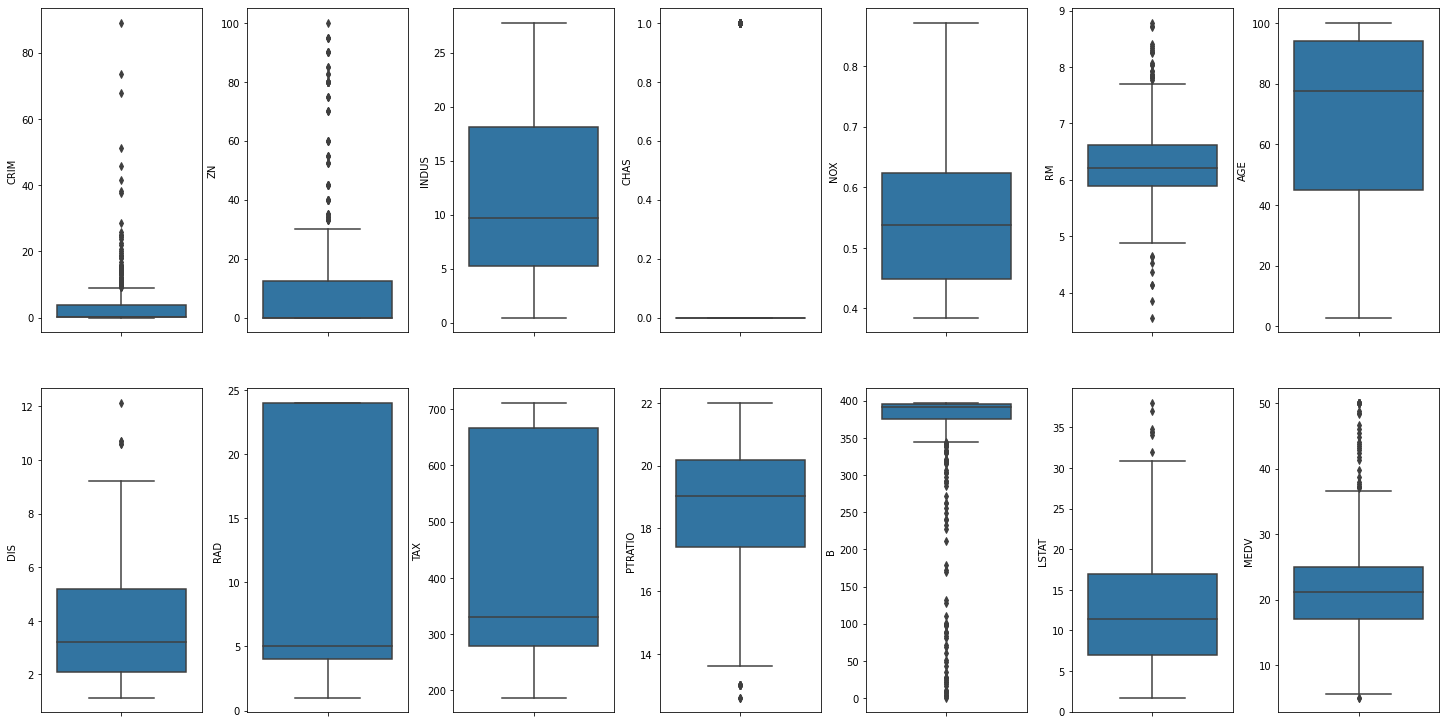

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Check for normal distributions

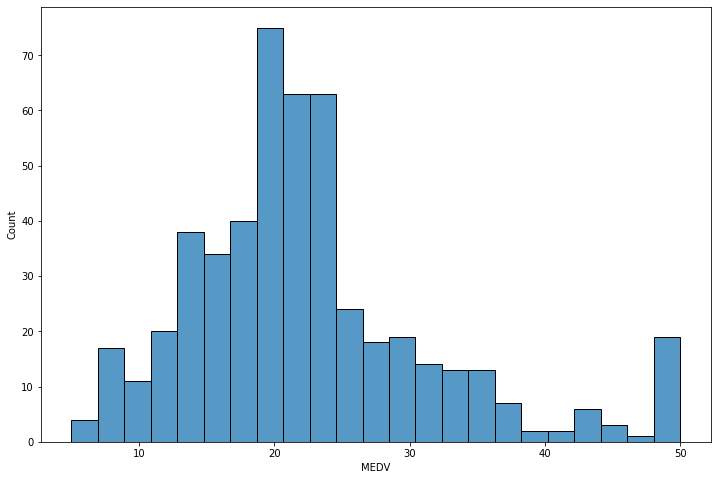

In [10]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x='MEDV')
plt.show()

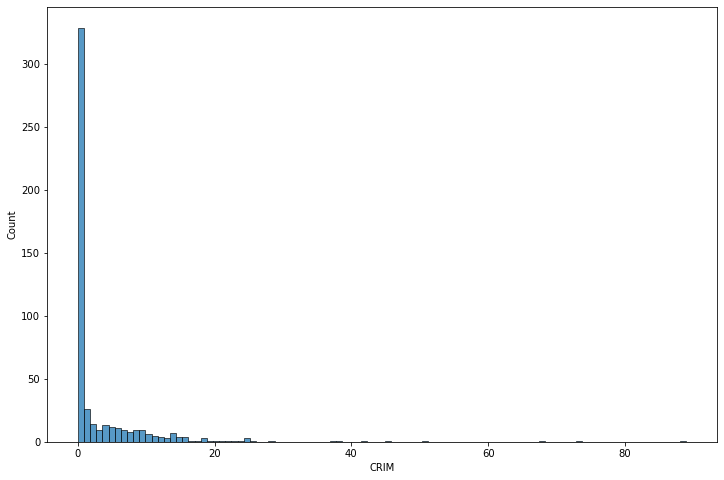

In [11]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x='CRIM')
plt.show()

<AxesSubplot:xlabel='CRIM', ylabel='MEDV'>

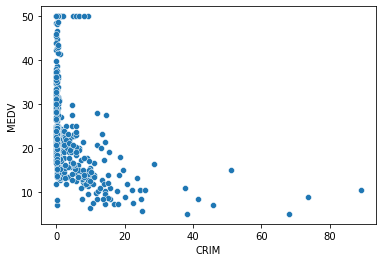

In [9]:
sns.scatterplot(data=data, x="CRIM", y="MEDV")

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

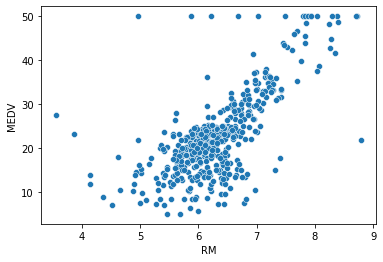

In [10]:
sns.scatterplot(data=data, x="RM", y="MEDV")

### Check for correlations between features

<AxesSubplot:>

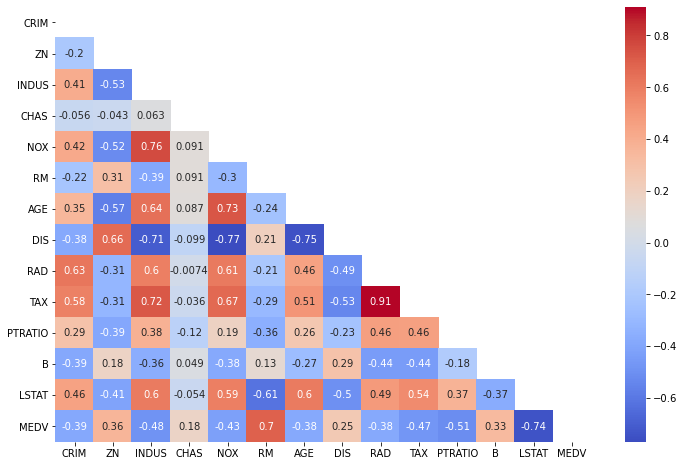

In [12]:
mask = np.zeros_like(data.corr())
tri_ind = np.triu_indices_from(mask)
mask[tri_ind] = True
plt.figure(figsize=[12, 8])
sns.heatmap(data=data.corr(), mask=mask, annot=True, cmap='coolwarm')